In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML, display_html
import seaborn as sns
import datetime

In [6]:
#set formatting
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [7]:
#read in CSV file data
df = pd.read_csv('Log_Angeles_United_States_reviews.csv')

In [8]:
#look at data
display(df.head())


,listing_id,date
0,8941071,2017-06-13
1,8951895,2016-06-13
2,8941071,2017-06-30
3,8941071,2017-05-21
4,8941071,2017-04-27


In [9]:
#look atshape of data
display(df.shape)

(1532925, 2)

In [10]:
#look at data types,Ideally look at all rows. Only look at first five here for minimal output.
display(df.iloc[:5,:5].isnull().any())

listing_id    False
date          False
dtype: bool

In [12]:
#display descriptive statistics
display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

,listing_id
count,1.532925e+06
mean,8.447806e+16
std,2.320841e+17
min,1.090000e+02
25%,1.149731e+07
50%,2.368548e+07
75%,4.443145e+07
85%,5.253356e+07
95%,7.212979e+17
99%,8.740625e+17


In [14]:
df = df.rename(columns = {'date': 'ds', 'listing_id': 'ts'})

In [15]:
df_example = df.groupby(by = 'ds').agg({'ts': 'count'})

In [16]:
df_example.index = pd.to_datetime(df_example.index)

In [17]:
df_example = df_example.asfreq(freq='1D')

In [18]:
df_example = df_example.sort_index(ascending = True)

In [19]:
df_example = df_example.fillna(value = 0)

In [20]:
display(df_example.tail())

,ts
ds,
2023-08-31,622.0
2023-09-01,486.0
2023-09-02,359.0
2023-09-03,389.0
2023-09-04,1.0


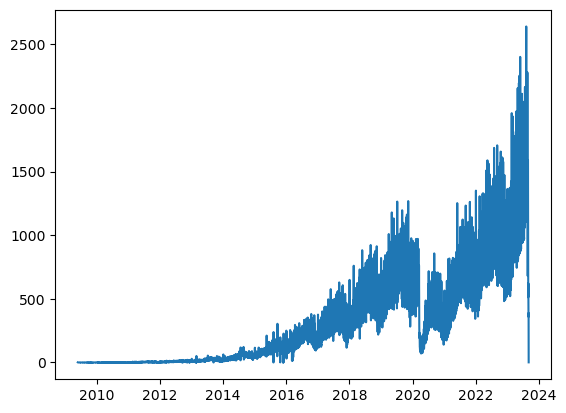

In [21]:
#Plot_Time_Series_Data
f, ax = plt.subplots(1,1)
ax.plot(df_example['ts'])

In [22]:
#Adding_title
ax.set_title("Time-Series Graph for 1 time-series example")

Text(0.5, 1.0, 'Time-Series Graph for 1 time-series example')

In [23]:
#Rotating_X-labels
ax.tick_params(axis = 'x', rotation = 45)

In [24]:
#Showing_Graph
plt.show()
plt.close()

In [26]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df, ts):
    """
    Test stationarity using moving average statistics and Dickney-Fuller Test
    """
    #Determing_rolling_statistics
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()

Index(['ts', 'ds'], dtype='object')


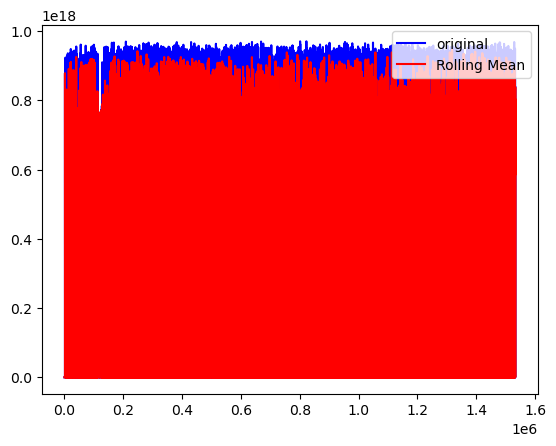

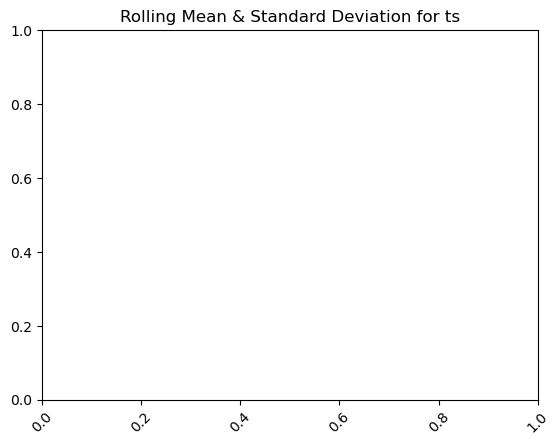

Results of Dickey-Fuller Test:


In [ ]:
#Plotting_Rolling_Statistics:
print(df.columns)  # Replace 'ColumnName' with the actual column name in your DataFrame
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'ts' is the column name in your DataFrame
ts = 'ts'

# Define the window size for rolling mean calculation
window_size = 10  # Replace this with the desired window size

# Calculate rolling mean
rolmean = df[ts].rolling(window=window_size).mean()

# Plot the original data and rolling mean
orig = plt.plot(df[ts], color='blue', label='original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')

# Other plotting configurations and legend
plt.legend(loc='best')
plt.show()

plt.title(f'Rolling Mean & Standard Deviation for {ts}')  # Using f-string for string formatting
plt.xticks(rotation = 45)
plt.show(block = False)
plt.close()

#Perform_Dickey-Fuller Test:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df[ts],
                 autolag='AIC')
dfoutput = pd.Series(dftest[0:4],
                     index = ['Test Statistic',
                             'p-value',
                             '# Lags Used',
                             'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value ($s)'][key] = value
print(dfoutput)